# **Análise exploratória - Wine Review**

---

## **Quais as etapas para uma boa análise exploratória?**
* Levantamento dos requisitos
* Entendimento do problema
* Tratamento e limpeza dos dados
* Análise (Extrair informações relevantes para conseguirmos solucionar o problema)---

# **1. Importando as bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

# **2. Carregando o Dataset**

In [2]:
df = pd.read_csv('winemag-data-130k-v2.csv')
df.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


---

## Catálogo dos dados

- **country** - País onde o vinho foi feito
- **description** - Descrição do vinho
- **designation** - Vinhedo dentro da adega onde as uvas que fizeram o vinho foram coletadas
- **points** - Número de pontos que o vinho obteve na avaliação
- **price** - Preço da garrafa do vinho
- **province** - Estado onde o vinho foi produzido
- **region_1** - Região onde o vinho foi produzido
- **region_2** - Região mais específica dentro de uma vinícola (Não trabalharemos com esta coluna)
- **taster_name** - Nome do avaliador
- **taster_twitter_handle** - Perfil do twitter do avaliador
- **tittle** - Nome do vinho avaliado junto com o ano de fabricação
- **variery** -Tipo de uva utilizada na produção dos vinhos
- **winery** - Adega onde o vinho foi feito

 ---


## Tabela Auxiliar (Escala de avaliações)
- **98-100** - Classico
- **94-97** - Soberbo
- **90-93** - Excelente
- **87-89** - Muito bom
- **83-86** - Bom
- **80-82** - Aceitável

  
---



## Perguntas
1. **Qual país tem o melhor vinho?**
2. **Existe alguma relação entre o preço e a qualidade dos vinhos?**
3. **Existe tipos de uvas de maior qualidade?**
4. **Qual o melhor vinho em cada faixa de preço?**

---

# **3. Compreensão dos dados**

In [3]:
# detalhando as colunas do dataset
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [4]:
# método para retornar as dimensoes do dataset (linhas , colunas)
df.shape

(129971, 14)

In [5]:
# métofo para retornar informaçõe gerais sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [6]:
# método para retornar análises estatísticas dos atributos do dataset
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [7]:
# agrupando valores por 'country'. Podemos filtrar o top 10 chamando o método .head()
df['country'].value_counts().head(10)

US           54504
France       22093
Italy        19540
Spain         6645
Portugal      5691
Chile         4472
Argentina     3800
Austria       3345
Australia     2329
Germany       2165
Name: country, dtype: int64

In [8]:
df['variety'].value_counts().head(10)

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Riesling                     5189
Sauvignon Blanc              4967
Syrah                        4142
Rosé                         3564
Merlot                       3102
Name: variety, dtype: int64

# **4. Tratamento dos dados**

## Criando uma cópia do df original

Quando estamos fazendo um projeto de data science, uma boa prática é sempre criar uma cópia do dataframe original para, posteriormente, realizarmos a análise exploratória

In [9]:
# copiando df
df1 = df.copy()

## Removendo colunas

In [10]:
# Necessário indicarmos qual o eixo que estaremos trabalhando (axis=0 ---> linhas) / (axis=1 ---> colunas)
df1 = df1.drop(['Unnamed: 0','designation', 'region_1', 'region_2','taster_twitter_handle', 'taster_name'], axis=1)

In [11]:
df1.shape

(129971, 8)

## Valores nulos ou ausente

In [12]:
# retornará a quantidade de valores nulos por coluna
df1.isnull().sum().sort_values(ascending=False)

price          8996
country          63
province         63
variety           1
description       0
points            0
title             0
winery            0
dtype: int64

In [13]:
# analisando quantos % do dataset restará se removermos todos os valores nulos
print("{:.0%}".format(df1['price'].count() / df1.shape[0]))

93%


In [14]:
# removendo valores nulos
df1 = df1.dropna(subset=['country', 'price', 'variety'])

---

# **5. Análise Exploratória dos dados**

Text(0, 0.5, 'Frequencia de distriubuição')

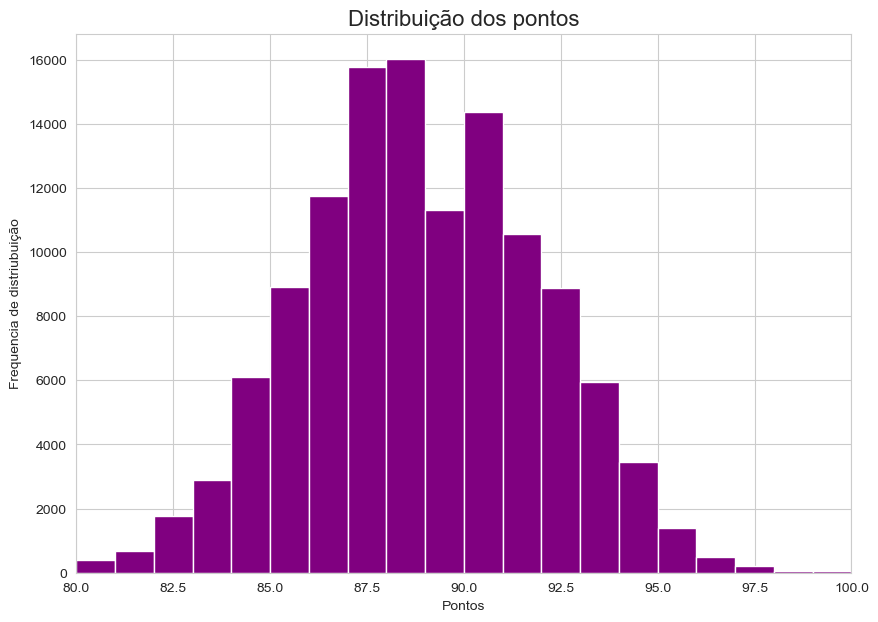

In [15]:
plt.figure(figsize=(10,7))
plt.hist(data=df1, x='points', bins=20, color='purple')
plt.xlim(80,100)
plt.title('Distribuição dos pontos', fontsize=16)
plt.xlabel('Pontos')
plt.ylabel('Frequencia de distriubuição')

In [16]:
# top 10 países avaliados
top_10_paises = df1['country'].value_counts()[:10]
top_10_paises

US           54265
France       17776
Italy        16914
Spain         6573
Portugal      4875
Chile         4415
Argentina     3756
Austria       2799
Australia     2294
Germany       2120
Name: country, dtype: int64

Text(0, 0.5, 'Total de vinhos avaliados')

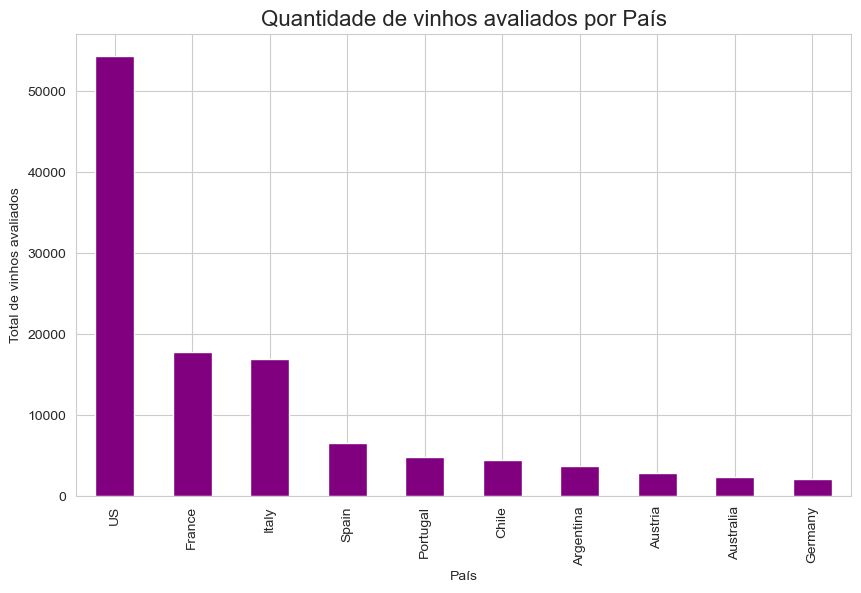

In [17]:
plt.figure(figsize=(10,6))
top_10_paises.plot(kind='bar', color='purple')
plt.title('Quantidade de vinhos avaliados por País', fontsize=16) 
plt.xlabel('País')
plt.ylabel('Total de vinhos avaliados')     

In [18]:
# vinhos com melhor qualidade
melhor_qualidade = df1.groupby('country').agg('mean')
melhor_qualidade = melhor_qualidade.sort_values(by='points', ascending=False)[:10]
melhor_qualidade.style.background_gradient(cmap='Purples', high=0.5, subset=['points'])

C:\Users\lm584\AppData\Local\Temp\ipykernel_1364\1340633847.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  melhor_qualidade = df1.groupby('country').agg('mean')


,points,price
country,,
England,91.550725,51.681159
India,90.222222,13.333333
Austria,90.190782,30.762772
Germany,89.836321,42.257547
Canada,89.377953,35.712598
Hungary,89.165517,40.648276
China,89.000000,18.000000
France,88.734867,41.139120
Luxembourg,88.666667,23.333333


Notamos que a Inglaterra é o país que produz o vinho de maior qualidade, mas iremos nos aprofundas nesta análise.

Text(0, 0.5, 'País')

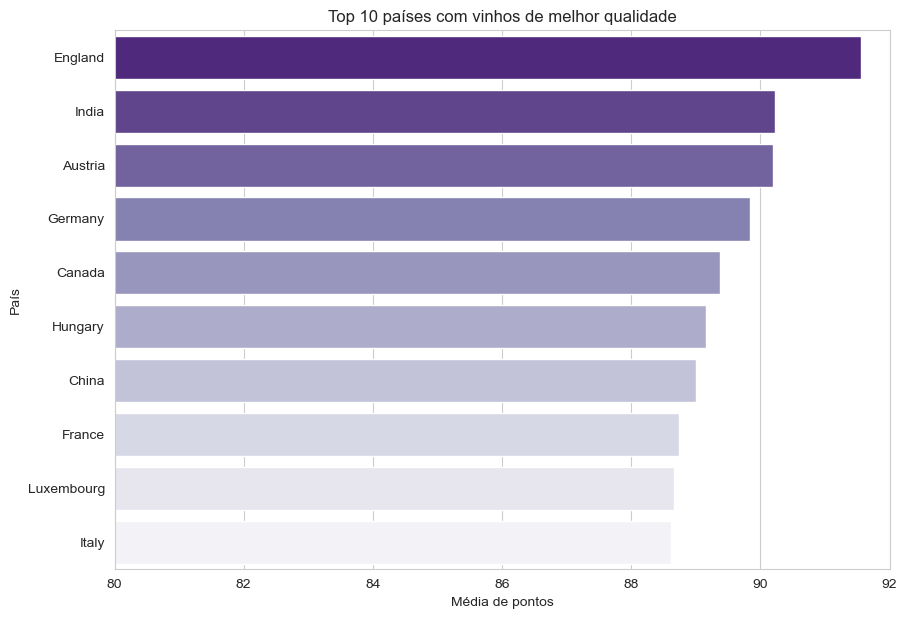

In [19]:
y = melhor_qualidade.index.to_series()
x = melhor_qualidade['points']

plt.figure(figsize=(10,7))
plt.xlim(80,92)
sns.barplot(x=x, y=y, palette='Purples_r')
plt.title('Top 10 países com vinhos de melhor qualidade')
plt.xlabel('Média de pontos')
plt.ylabel('País')

In [20]:
# países com pontuação acima de 95
acima_95_pontos = df1[df1['points'] >= 95]
acima_95_pontos['country'].value_counts()

US              991
France          509
Italy           326
Austria         103
Portugal         96
Germany          62
Spain            51
Australia        47
Argentina        11
Hungary           5
England           3
South Africa      3
Chile             2
New Zealand       2
Name: country, dtype: int64

Notamos que a Inglaterra possui apenas 3 vinhos acima de 95, ou seja, devemos nos aprofundar na análise para melhor entendimento

Text(0, 0.5, 'País')

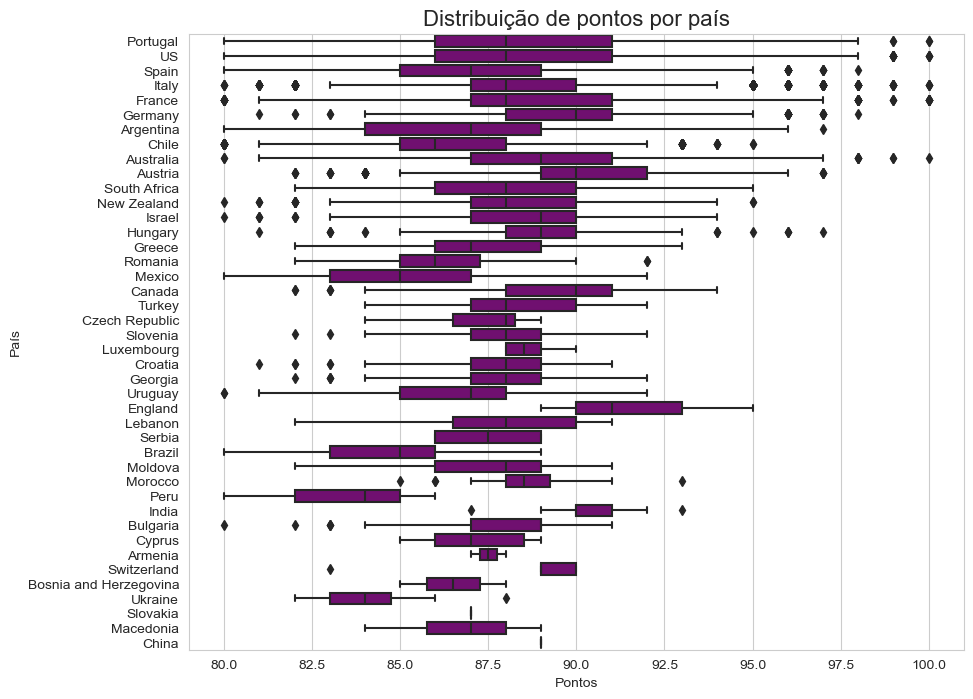

In [21]:
# Distribuição dos pontos por país
plt.figure(figsize=(10,8))
sns.boxplot(data=df1, x='points', y='country', color='Purple')
plt.title('Distribuição de pontos por país', fontsize=16)
plt.xlabel('Pontos')
plt.ylabel('País')

Podemos perceber que, se seguirmos a média, a Inglaterra é a melhor avaliada. No entanto, se olharmos para países como Portugal, US, Italy e France todos obtiveram nota máxima em algum de seus vinhos. Portanto, para a comparação da Inglaterra com estes quatro países se torna desleal pois os vinhos da Inglaterra estão com menos frequencia do que os demais.

C:\Users\lm584\AppData\Local\Temp\ipykernel_1364\3100082920.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  preco_medio = df1.groupby('country').agg('mean')


Text(0, 0.5, 'País')

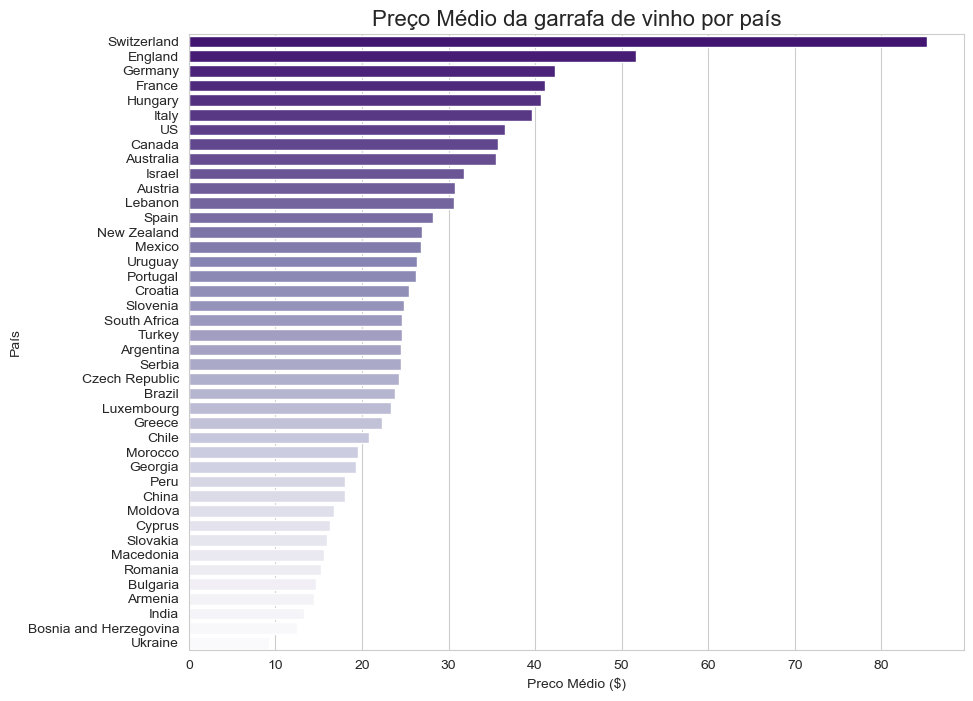

In [22]:
# vamos analisar os preços médios práticados em cada país

preco_medio = df1.groupby('country').agg('mean')
preco_medio = preco_medio.sort_values(by='price', ascending=False)

y = preco_medio.index.to_series()
x = preco_medio['price']

plt.figure(figsize=(10,8))
sns.barplot(x=x, y=y, palette='Purples_r')
plt.title('Preço Médio da garrafa de vinho por país', fontsize=16)
plt.xlabel('Preco Médio ($)')
plt.ylabel('País')

Notamos que a Suiça produz o vinho mais caro e, em contrapartida, temos a Ucrania com o vinho mais barato

---

## **Q1. Existe alguma relação entre preço e qualidade?**

Text(0, 0.5, 'Frequência')

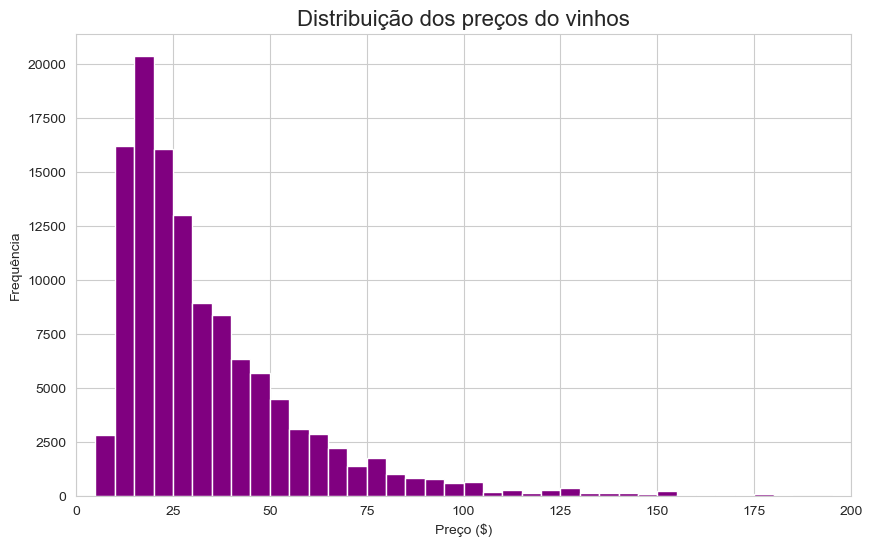

In [23]:
# podemos utilizar o método do seaborn 'np.arange' para determinar o melhor valor de bins para o gráfico

plt.figure(figsize=(10,6))
bins = np.arange(0, df1['price'].max()+5, 5)
plt.hist(data=df1, x='price', bins=bins, color='Purple')
plt.xlim(0,200)
plt.title('Distribuição dos preços do vinhos', fontsize=16)
plt.xlabel('Preço ($)')
plt.ylabel('Frequência')

In [24]:
# valores muito distorcidos
df1['price'].describe()

count    120915.000000
mean         35.368796
std          41.031188
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [25]:
# ajustando os valores para uma escala logaritmica
np.log10(df1['price'].describe())

count    5.082480
mean     1.548620
std      1.613114
min      0.602060
25%      1.230449
50%      1.397940
75%      1.623249
max      3.518514
Name: price, dtype: float64

Text(0, 0.5, 'Frequência')

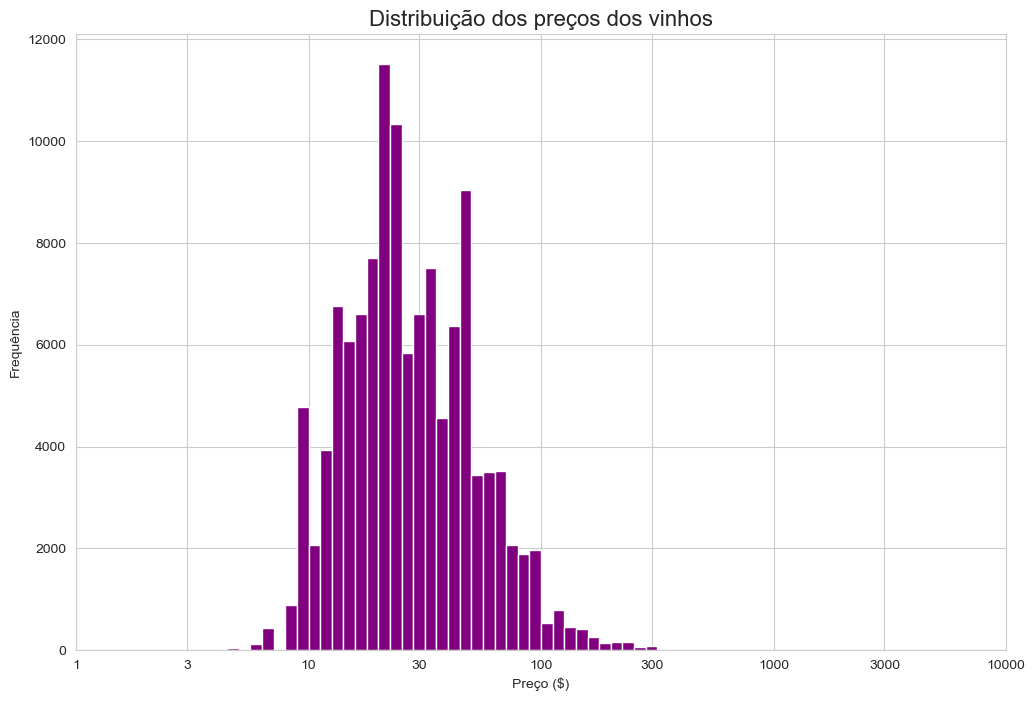

In [27]:
plt.figure(figsize=(12,8))
bins = 10 ** np.arange(0.5, 2.5 + 0.05, 0.05)
valores = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
           
plt.hist(data=df1, x='price', bins=bins, color='Purple')
plt.title('Distribuição dos preços dos vinhos', fontsize=16)
plt.xscale('log')
plt.xticks(valores, valores)        
plt.xlabel('Preço ($)')          
plt.ylabel('Frequência')           